# Machine Learning - Regression Model
## by Vesna Pop-Dimitrijoska
---

---
# Data Preprocessing & EDA
---

# Dataset
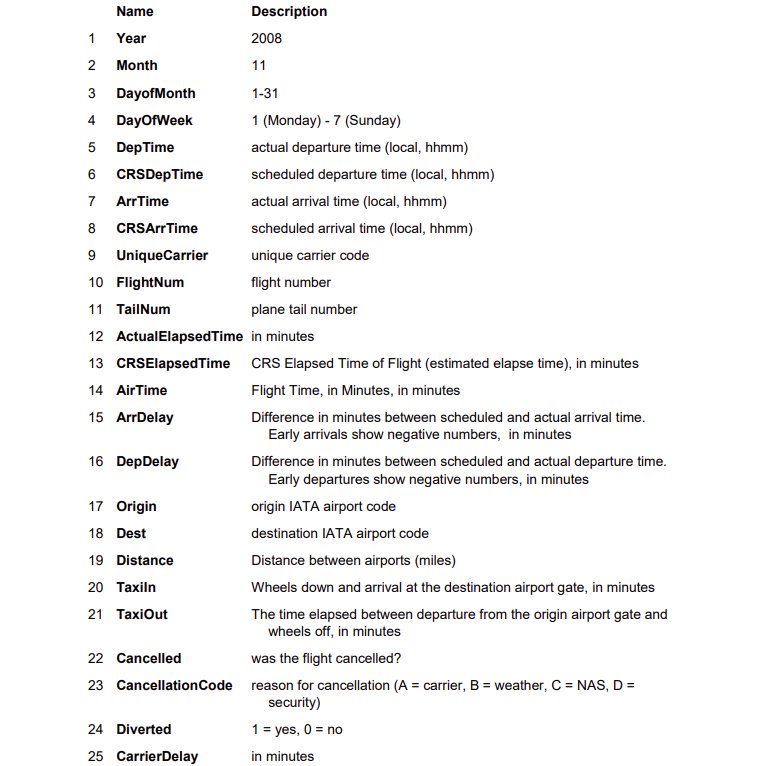
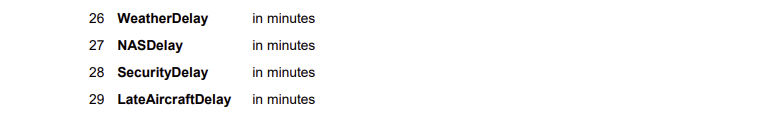

---
# Loading the libraries

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm       
import copy

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
                     
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import train_test_split

from tpot import TPOTRegressor
from tpot.builtins import StackingEstimator

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor

# Regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

RANDOM_STATE=42
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

---
# Read the Dataset

In [2]:
org_df = pd.read_csv('airlinedelaycauses_DelayedFlights.csv', index_col=0).reset_index(drop=True) 
df = org_df.copy()

display(df.head())

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
3  2008      1           3          4   1829.0        1755   1959.0   
4  2008      1           3          4   1940.0        1915   2121.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2225            WN        335  ...    4.0      8.0          0   
1        1000            WN       3231  ...    5.0     10.0          0   
2         750            WN        448  ...    3.0     17.0          0   
3        1925            WN       3920  ...    3.0     10.0          0   
4        2110            WN        378  ...    4.0     10.0          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0                 N         0           NaN          NaN      NaN   
1                 N         0           NaN          NaN      NaN   
2                 N         0           NaN          NaN      NaN   
3                 N         0           2.0          0.0      0.0   
4                 N         0           NaN          NaN      NaN   

   SecurityDelay  LateAircraftDelay  
0            NaN                NaN  
1            NaN                NaN  
2            NaN                NaN  
3            0.0               32.0  
4            NaN                NaN  

[5 rows x 29 columns]

---
# Preliminary analysis of a dataset

In [3]:
print('Shape of the dataset:\n-------------------------------------------------------------')
print(f'{df.shape[0]} x {df.shape[1]}\n\n')

print('Basic info of the dataset:\n-------------------------------------------------------------')
print(df.info(), '\n\n')

print('Sum of NaN values in each column:\n-------------------------------------------------------------')
print(df.isna().sum(), '\n\n')

Shape of the dataset:
-------------------------------------------------------------
1936758 x 29


Basic info of the dataset:
-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             flo

In [4]:
print('Duplicates in the dataset:\n-------------------------------------------------------------')
display(df.loc[df.duplicated()])

print('\n\n\nUnique data in the dataset:\n-------------------------------------------------------------')
print(df.nunique().sort_values())

Duplicates in the dataset:
-------------------------------------------------------------


Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
294863  2008      2          28          4   1854.0        1807   1946.0   
294865  2008      2          28          4   2027.0        1942   2314.0   

        CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
294863        1902            F9        773  ...    8.0     13.0          0   
294865        2229            F9        780  ...   10.0     13.0          0   

        CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
294863                 N         0          44.0          0.0      0.0   
294865                 N         0           1.0          0.0     44.0   

        SecurityDelay  LateAircraftDelay  
294863            0.0                0.0  
294865            0.0                0.0  

[2 rows x 29 columns]




Unique data in the dataset:
-------------------------------------------------------------
Year                    1
Diverted                2
Cancelled               2
CancellationCode        4
DayOfWeek               7
Month                  12
UniqueCarrier          20
DayofMonth             31
SecurityDelay         156
TaxiIn                180
Origin                303
Dest                  304
TaxiOut               332
CRSElapsedTime        515
LateAircraftDelay     564
NASDelay              574
WeatherDelay          599
AirTime               650
ActualElapsedTime     673
CarrierDelay          983
DepDelay             1058
ArrDelay             1128
CRSDepTime           1207
CRSArrTime           1364
Distance             1419
DepTime              1438
ArrTime              1440
TailNum              5366
FlightNum            7499
dtype: int64


In [5]:
# Summary Statistics of the dataset

df.describe()

Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  1936758.0  1.936758e+06  1.936758e+06  1.936758e+06  1.936758e+06   
mean      2008.0  6.111106e+00  1.575347e+01  3.984827e+00  1.518534e+03   
std          0.0  3.482546e+00  8.776272e+00  1.995966e+00  4.504853e+02   
min       2008.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%       2008.0  3.000000e+00  8.000000e+00  2.000000e+00  1.203000e+03   
50%       2008.0  6.000000e+00  1.600000e+01  4.000000e+00  1.545000e+03   
75%       2008.0  9.000000e+00  2.300000e+01  6.000000e+00  1.900000e+03   
max       2008.0  1.200000e+01  3.100000e+01  7.000000e+00  2.400000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  1.936758e+06  1.929648e+06  1.936758e+06  1.936758e+06   
mean   1.467473e+03  1.610141e+03  1.634225e+03  2.184263e+03   
std    4.247668e+02  5.481781e+02  4.646347e+02  1.944702e+03   
min    0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%    1.135000e+03  1.316000e+03  1.325000e+03  6.100000e+02   
50%    1.510000e+03  1.715000e+03  1.705000e+03  1.543000e+03   
75%    1.815000e+03  2.030000e+03  2.014000e+03  3.422000e+03   
max    2.359000e+03  2.400000e+03  2.400000e+03  9.742000e+03   

       ActualElapsedTime  ...      Distance        TaxiIn       TaxiOut  \
count       1.928371e+06  ...  1.936758e+06  1.929648e+06  1.936303e+06   
mean        1.333059e+02  ...  7.656862e+02  6.812975e+00  1.823220e+01   
std         7.206007e+01  ...  5.744797e+02  5.273595e+00  1.433853e+01   
min         1.400000e+01  ...  1.100000e+01  0.000000e+00  0.000000e+00   
25%         8.000000e+01  ...  3.380000e+02  4.000000e+00  1.000000e+01   
50%         1.160000e+02  ...  6.060000e+02  6.000000e+00  1.400000e+01   
75%         1.650000e+02  ...  9.980000e+02  8.000000e+00  2.100000e+01   
max         1.114000e+03  ...  4.962000e+03  2.400000e+02  4.220000e+02   

          Cancelled      Diverted  CarrierDelay  WeatherDelay      NASDelay  \
count  1.936758e+06  1.936758e+06  1.247488e+06  1.247488e+06  1.247488e+06   
mean   3.268348e-04  4.003598e-03  1.917940e+01  3.703571e+00  1.502164e+01   
std    1.807562e-02  6.314722e-02  4.354621e+01  2.149290e+01  3.383305e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  2.000000e+00  0.000000e+00  2.000000e+00   
75%    0.000000e+00  0.000000e+00  2.100000e+01  0.000000e+00  1.500000e+01   
max    1.000000e+00  1.000000e+00  2.436000e+03  1.352000e+03  1.357000e+03   

       SecurityDelay  LateAircraftDelay  
count   1.247488e+06       1.247488e+06  
mean    9.013714e-02       2.529647e+01  
std     2.022714e+00       4.205486e+01  
min     0.000000e+00       0.000000e+00  
25%     0.000000e+00       0.000000e+00  
50%     0.000000e+00       8.000000e+00  
75%     0.000000e+00       3.300000e+01  
max     3.920000e+02       1.316000e+03  

[8 rows x 24 columns]

In [6]:
# Analysis of unique categories in categorical data

categorical_columns = df.select_dtypes('object').columns
numerical_columns = df.select_dtypes('number').columns

for column in categorical_columns:
    print(f'{column}:\n', df[column].unique(), '\n')

UniqueCarrier:
 ['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW'
 '9E' 'AA' 'AQ' 'AS' 'B6' 'CO'] 

TailNum:
 ['N712SW' 'N772SW' 'N428WN' ... 'N75428' 'N75429' 'N78008'] 

Origin:
 ['IAD' 'IND' 'ISP' 'JAN' 'JAX' 'LAS' 'LAX' 'LBB' 'LIT' 'MAF' 'MCI' 'MCO'
 'MDW' 'MHT' 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'ORF' 'PBI' 'PDX' 'PHL' 'PHX'
 'PIT' 'PVD' 'RDU' 'RNO' 'RSW' 'SAN' 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC'
 'SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS' 'ABQ' 'ALB' 'AMA' 'AUS' 'BDL' 'BHM'
 'BNA' 'BOI' 'BUF' 'BUR' 'BWI' 'CLE' 'CMH' 'CRP' 'DAL' 'DEN' 'DTW' 'ELP'
 'FLL' 'GEG' 'HOU' 'HRL' 'ROC' 'ORD' 'EWR' 'SYR' 'IAH' 'CRW' 'FAT' 'COS'
 'MRY' 'LGB' 'BFL' 'EUG' 'ICT' 'MEM' 'BTV' 'MKE' 'LFT' 'BRO' 'PWM' 'MSP'
 'SRQ' 'CLT' 'CVG' 'GSO' 'SHV' 'DCA' 'TYS' 'GSP' 'RIC' 'DFW' 'BGR' 'DAY'
 'GRR' 'CHS' 'CAE' 'TLH' 'XNA' 'GPT' 'VPS' 'LGA' 'ATL' 'MSN' 'SAV' 'BTR'
 'LEX' 'LRD' 'MOB' 'MTJ' 'GRK' 'AEX' 'PNS' 'ABE' 'HSV' 'CHA' 'MFE' 'MLU'
 'DSM' 'MGM' 'AVL' 'LCH' 'BOS' 'MYR' 'CLL' 'DAB' 'ASE' 'ATW' 'BMI' '

---
# CONCLUSION from preliminary analysis of a dataset:
---
### Shape of a Dataset:     
Shape of the dataset is: 1936758 rows x 29 columns (without index column).

### Target Class
Target class is combination of all of the delay columns into one column by adding them up. This is the new target and after the NaN values in the individual columns are deleted, they will be summarized in one column.

### NaN values:  
There are 689270 rows with NaN values from the target features that should be deleted, because this is the target class we are predicting, imputation is not allowed.

There were other columns with NaN values, but after deleting the NaN from target features, other NaN values were also deleted, because they were in the same rows with the deleted ones.

There were only 2 NaN values in one of the columns, and they were deleted as well.

Deletion is done below in the code.

### Constant values:  
Column 'Year' has only one constant value so it will be deleted.

After rows deletion with NaN values, it was observed that three more columns had constant values: 'CancellationCode', 'Cancelled', 'Diverted'. They will be deleted from the dataset as well.  

### Non-informative and semantic irrelevant features
Columns 'FlightNum' and 'DayOfMonth' in my opinion are semantic irrelevant features and should be deleted from the dataset. 

### Data types:  
Except for date columns that should be concatanated into one datetime column, all other features have appropriate data type.

### Duplicates:  
There are 2 duplicate rows in the dataset and they will be deleted.

### Typos:       
There are no typos that need to be corrected.

### Descriptive statistics:
The summary statistics for the numerical columns in the dataset shows quick overview of the distribution and data variability that occurs in all columns. 
Column 'year' has constant value and should be deleted.
It is recommended to scale the features in order to ensure that they are on a similar scale, because some ML algorithms are sensitive to the scale of the features.

---
# Handling missing values (Detailed analysis and Deletion)

In [7]:
# Dropping irrelevant features: 

cols_to_drop_irr = ['FlightNum', 'DayofMonth']
df = df.drop(columns=cols_to_drop_irr)

In [8]:
# Dropping constant features:

cols_to_drop_const = ['Year']
df = df.drop(columns=cols_to_drop_const)

In [9]:
# This code is left for later on..
# # Concatanate the individual 'Year', 'Month' and 'Day' columns into one and conversion in appropriate data type
# df['Date'] = pd.to_datetime(df[['Year', 'Month', 'DayofMonth']].astype(str).agg('-'.join, axis=1))

# # Dropping the individual 'Year', 'Month' and 'Day' columns 
# df.drop(['Year', 'Month', 'DayofMonth'], axis=1, inplace=True)

In [10]:
# Dropping NaN values from individual delay columns (targets), summing them in one column, and deleting 
# the old ones from the dataset

print("Dropping NaN targets from individual delay columns:")
print(df.isna().sum()[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']])
df.dropna(subset=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], how='any', inplace=True)

print("\nNaN values after deleting:")
print(df.isna().sum()[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']])

# Summing the individual delay columns
df['Delay'] = df['CarrierDelay'] + df['WeatherDelay'] + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay']

# Drop the individual delay columns 
cols_to_drop_target = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df = df.drop(columns=cols_to_drop_target)

Dropping NaN targets from individual delay columns:
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

NaN values after deleting:
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


In [11]:
# Dropping duplicates

df.drop_duplicates(inplace=True)

In [12]:
# One final analysis after cleaning the dataset

print('Shape of the dataset:\n-------------------------------------------------------------')
print(f'{df.shape[0]} x {df.shape[1]}\n\n')

print('Basic info of the dataset:\n-------------------------------------------------------------')
print(df.info(), '\n\n')

print('Sum of NaN values in each column:\n-------------------------------------------------------------')
print(df.isna().sum(), '\n\n')

print('Duplicates in the dataset:\n-------------------------------------------------------------')
display(df.loc[df.duplicated()])

Shape of the dataset:
-------------------------------------------------------------
1247486 x 22


Basic info of the dataset:
-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247486 entries, 3 to 1936755
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Month              1247486 non-null  int64  
 1   DayOfWeek          1247486 non-null  int64  
 2   DepTime            1247486 non-null  float64
 3   CRSDepTime         1247486 non-null  int64  
 4   ArrTime            1247486 non-null  float64
 5   CRSArrTime         1247486 non-null  int64  
 6   UniqueCarrier      1247486 non-null  object 
 7   TailNum            1247484 non-null  object 
 8   ActualElapsedTime  1247486 non-null  float64
 9   CRSElapsedTime     1247486 non-null  float64
 10  AirTime            1247486 non-null  float64
 11  ArrDelay           1247486 non-null  float64

Empty DataFrame
Columns: [Month, DayOfWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime, UniqueCarrier, TailNum, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, Origin, Dest, Distance, TaxiIn, TaxiOut, Cancelled, CancellationCode, Diverted, Delay]
Index: []

[0 rows x 22 columns]

In [13]:
# Dropping NaN values from 'TailNum' column

df.dropna(subset=['TailNum'], how='all', inplace=True)
print('Sum of NaN values in each column:\n-------------------------------------------------------------')
print(df.isna().sum(), '\n\n')

Sum of NaN values in each column:
-------------------------------------------------------------
Month                0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
Delay                0
dtype: int64 




In [14]:
print('Unique data in the dataset after some manipulations:\n-------------------------------------------------------------')
print(df.nunique().sort_values())

Unique data in the dataset after some manipulations:
-------------------------------------------------------------
CancellationCode        1
Cancelled               1
Diverted                1
DayOfWeek               7
Month                  12
UniqueCarrier          20
TaxiIn                180
Dest                  301
Origin                302
TaxiOut               332
CRSElapsedTime        497
AirTime               645
ActualElapsedTime     668
ArrDelay             1044
Delay                1044
DepDelay             1053
CRSDepTime           1182
CRSArrTime           1350
Distance             1404
DepTime              1435
ArrTime              1440
TailNum              5349
dtype: int64


In [15]:
# Dropping aditional constant features:

cols_to_drop_const = ['CancellationCode', 'Cancelled', 'Diverted']
df = df.drop(columns=cols_to_drop_const)

print('Shape of the dataset:\n-------------------------------------------------------------')
print(f'{df.shape[0]} x {df.shape[1]}\n\n')

Shape of the dataset:
-------------------------------------------------------------
1247484 x 19




---
# Exploratory Data Analysis

In [16]:
categorical_columns = df.select_dtypes('object').columns
numerical_columns = df.select_dtypes('number').columns

cat_cols = list(categorical_columns)
num_cols = list(numerical_columns)

## Target class analysis

Distribution of the target class:
-----------------------------------------------------------------------------------------------------------
15.0      32476
16.0      31198
17.0      30288
18.0      29816
19.0      28658
          ...  
1707.0        1
1018.0        1
734.0         1
978.0         1
991.0         1
Name: Delay, Length: 1044, dtype: int64



Unique data in the target class:
-------------------------------------------------------------
1044

Since the target class has 1044 unique values, it needs to be digitized by converting them into a discrete variable.


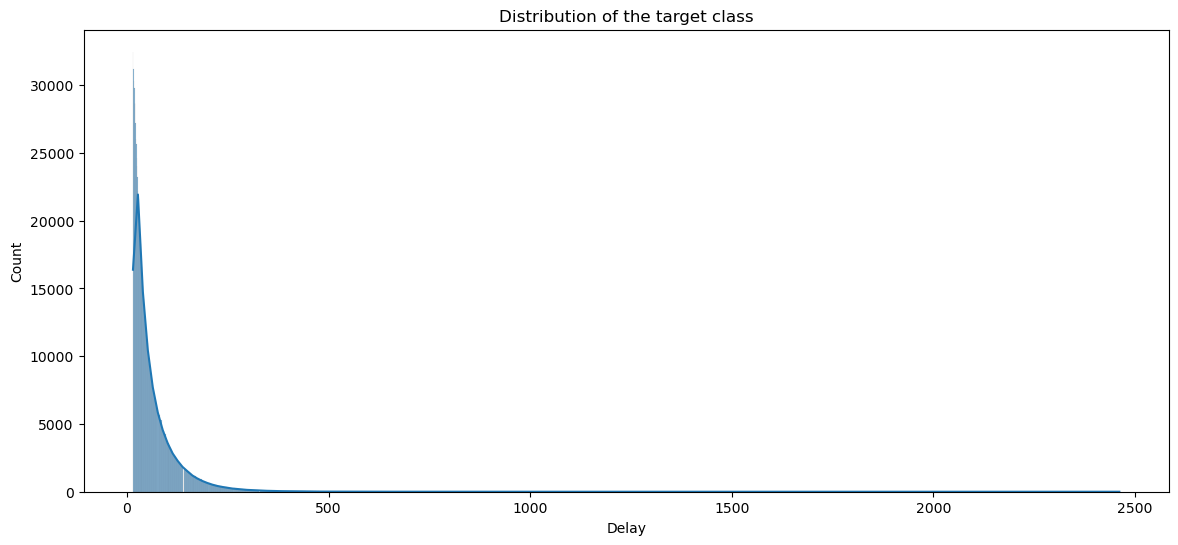

In [17]:
print('Distribution of the target class:')
print('-----------------------------------------------------------------------------------------------------------')
print(df['Delay'].value_counts())

print('\n\n\nUnique data in the target class:\n-------------------------------------------------------------')
print(df['Delay'].nunique())

print('\nSince the target class has 1044 unique values, it needs to be digitized by converting them into a discrete variable.')

fig = plt.figure(figsize=(14, 6))
sns.histplot(df, x=df['Delay'], kde=True)
plt.title('Distribution of the target class')
plt.show()

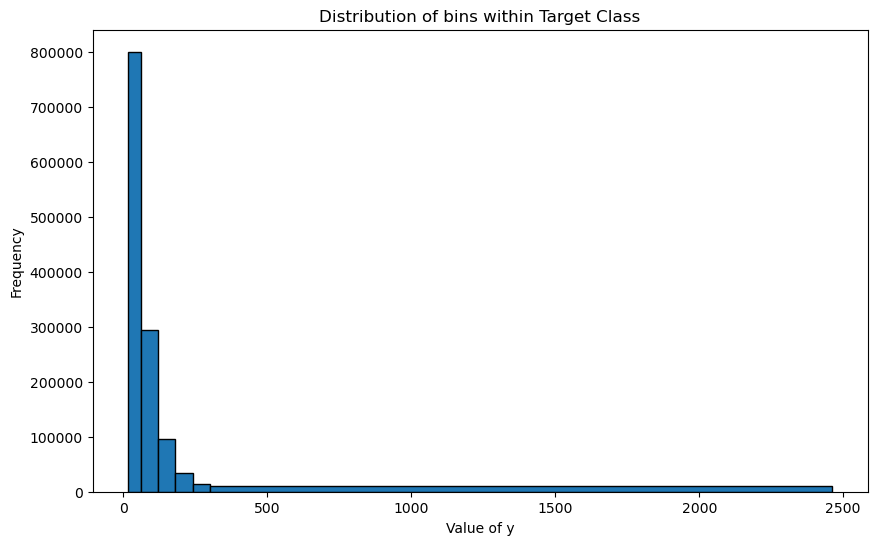

Bin 1: 799657 samples
Bin 2: 293221 samples
Bin 3: 95963 samples
Bin 4: 34499 samples
Bin 5: 13322 samples
Bin 6: 10822 samples


In [18]:
y = df['Delay']
bins = [15, 60, 120, 180, 240, 300, 2462]
y_binned = np.digitize(y, bins=bins, right=True)

plt.figure(figsize=(10, 6))
plt.hist(y, bins=bins, edgecolor='k')
plt.xlabel('Value of y')
plt.ylabel('Frequency')
plt.title('Distribution of bins within Target Class')
plt.show()

hist, bin_edges = np.histogram(y, bins=bins)

for i in range(len(hist)):
    print(f'Bin {i+1}: {hist[i]} samples')

## Correlation between columns

<Axes: >

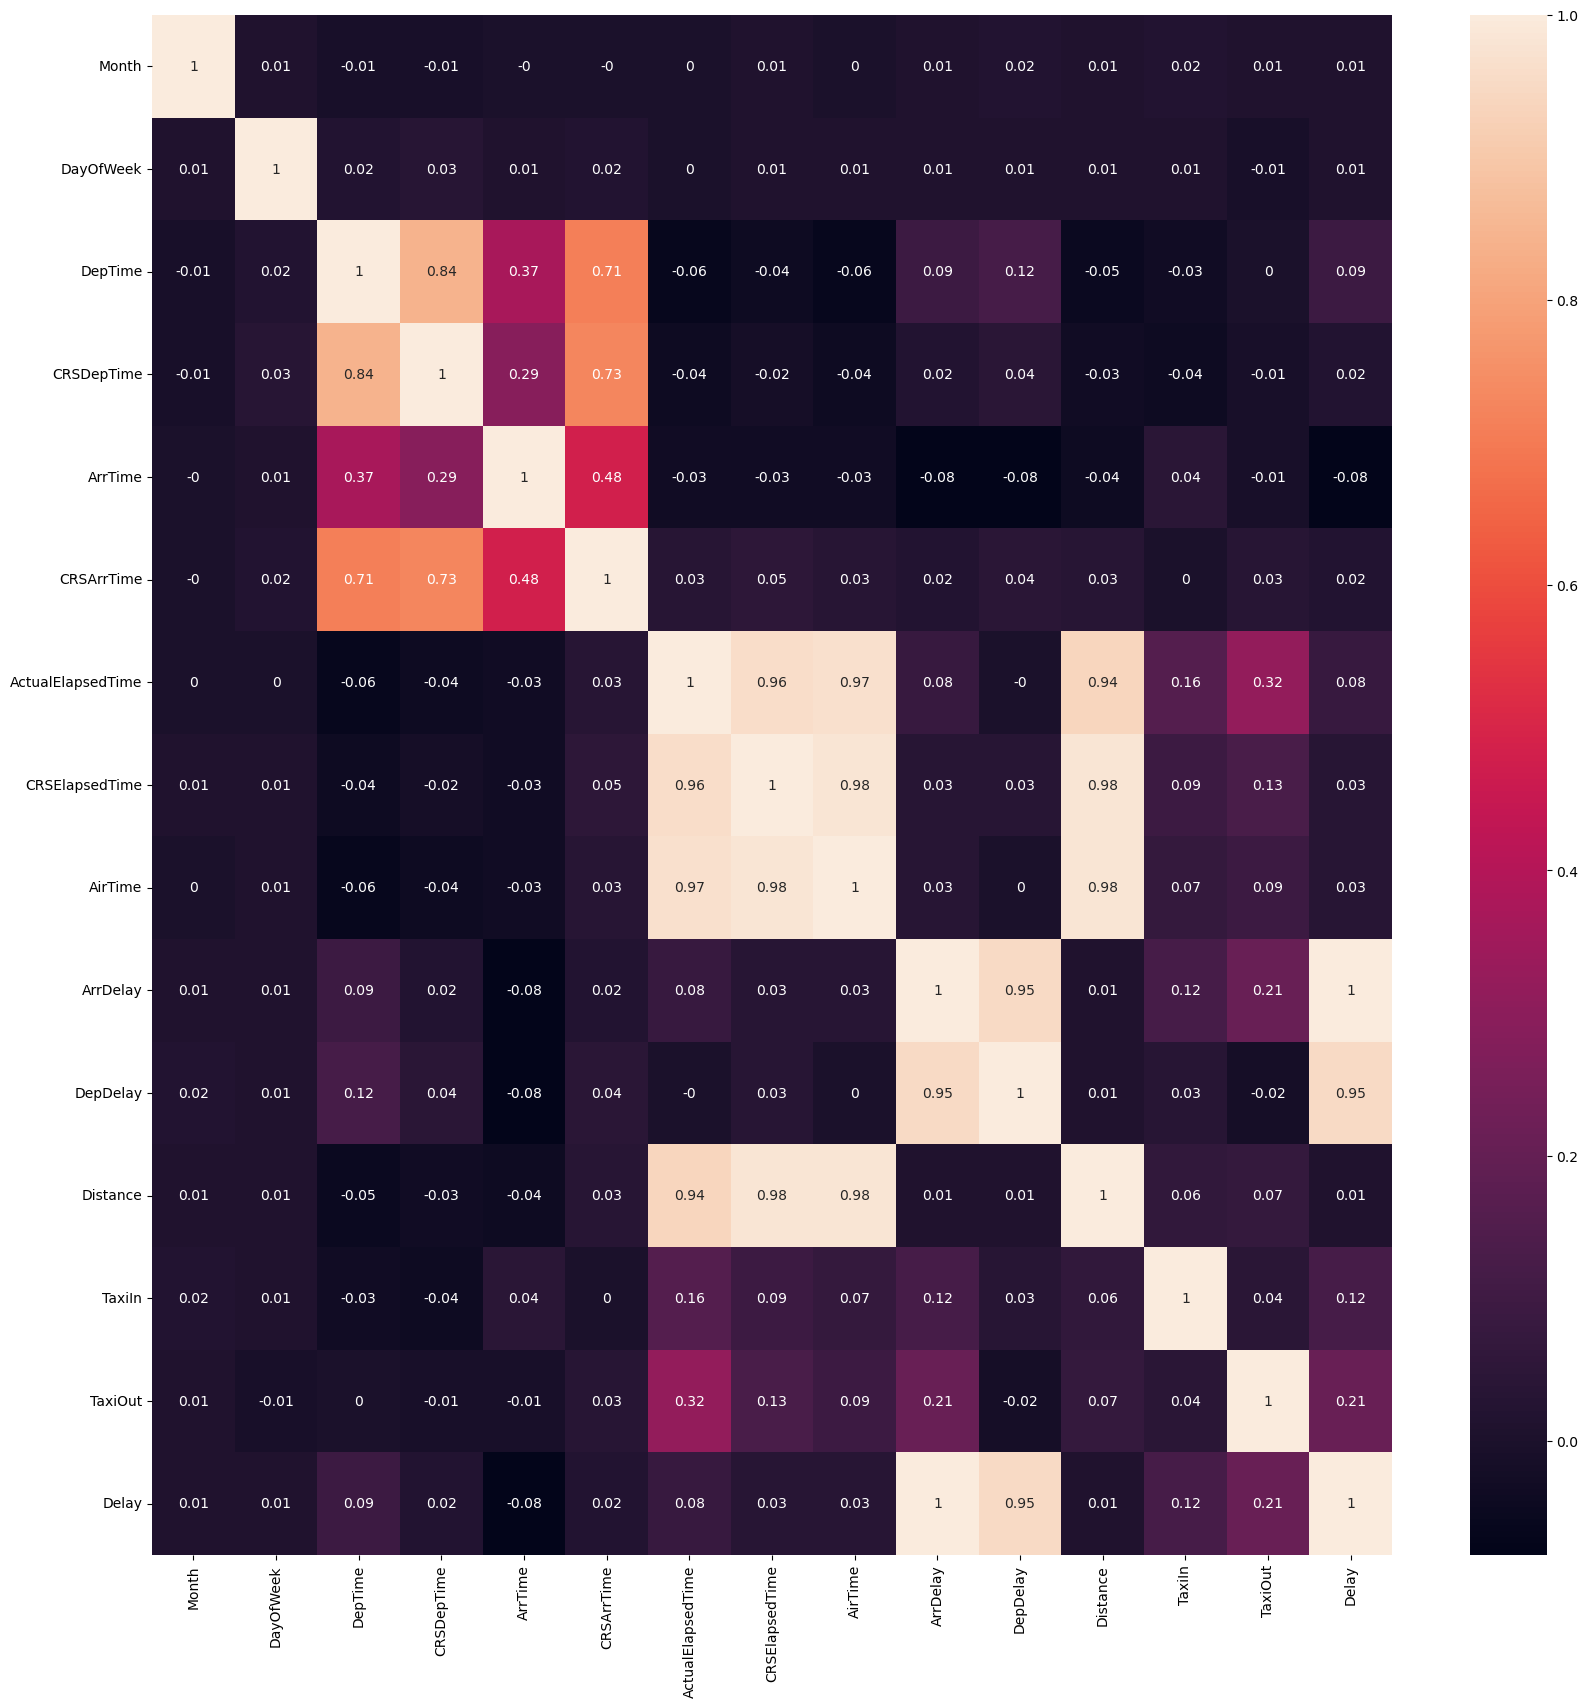

In [19]:
df_corr = df.corr(numeric_only=True, method='pearson').round(decimals=2)
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True) 

In [20]:
# Dropping aditional features after correlation analysis:

cols_to_drop_eda = ['DepDelay', 'ArrDelay', 'CRSElapsedTime', 'AirTime', 'Distance']
df = df.drop(columns=cols_to_drop_eda)

df = df.reset_index(drop=True)

## Visual representation of the Dataset

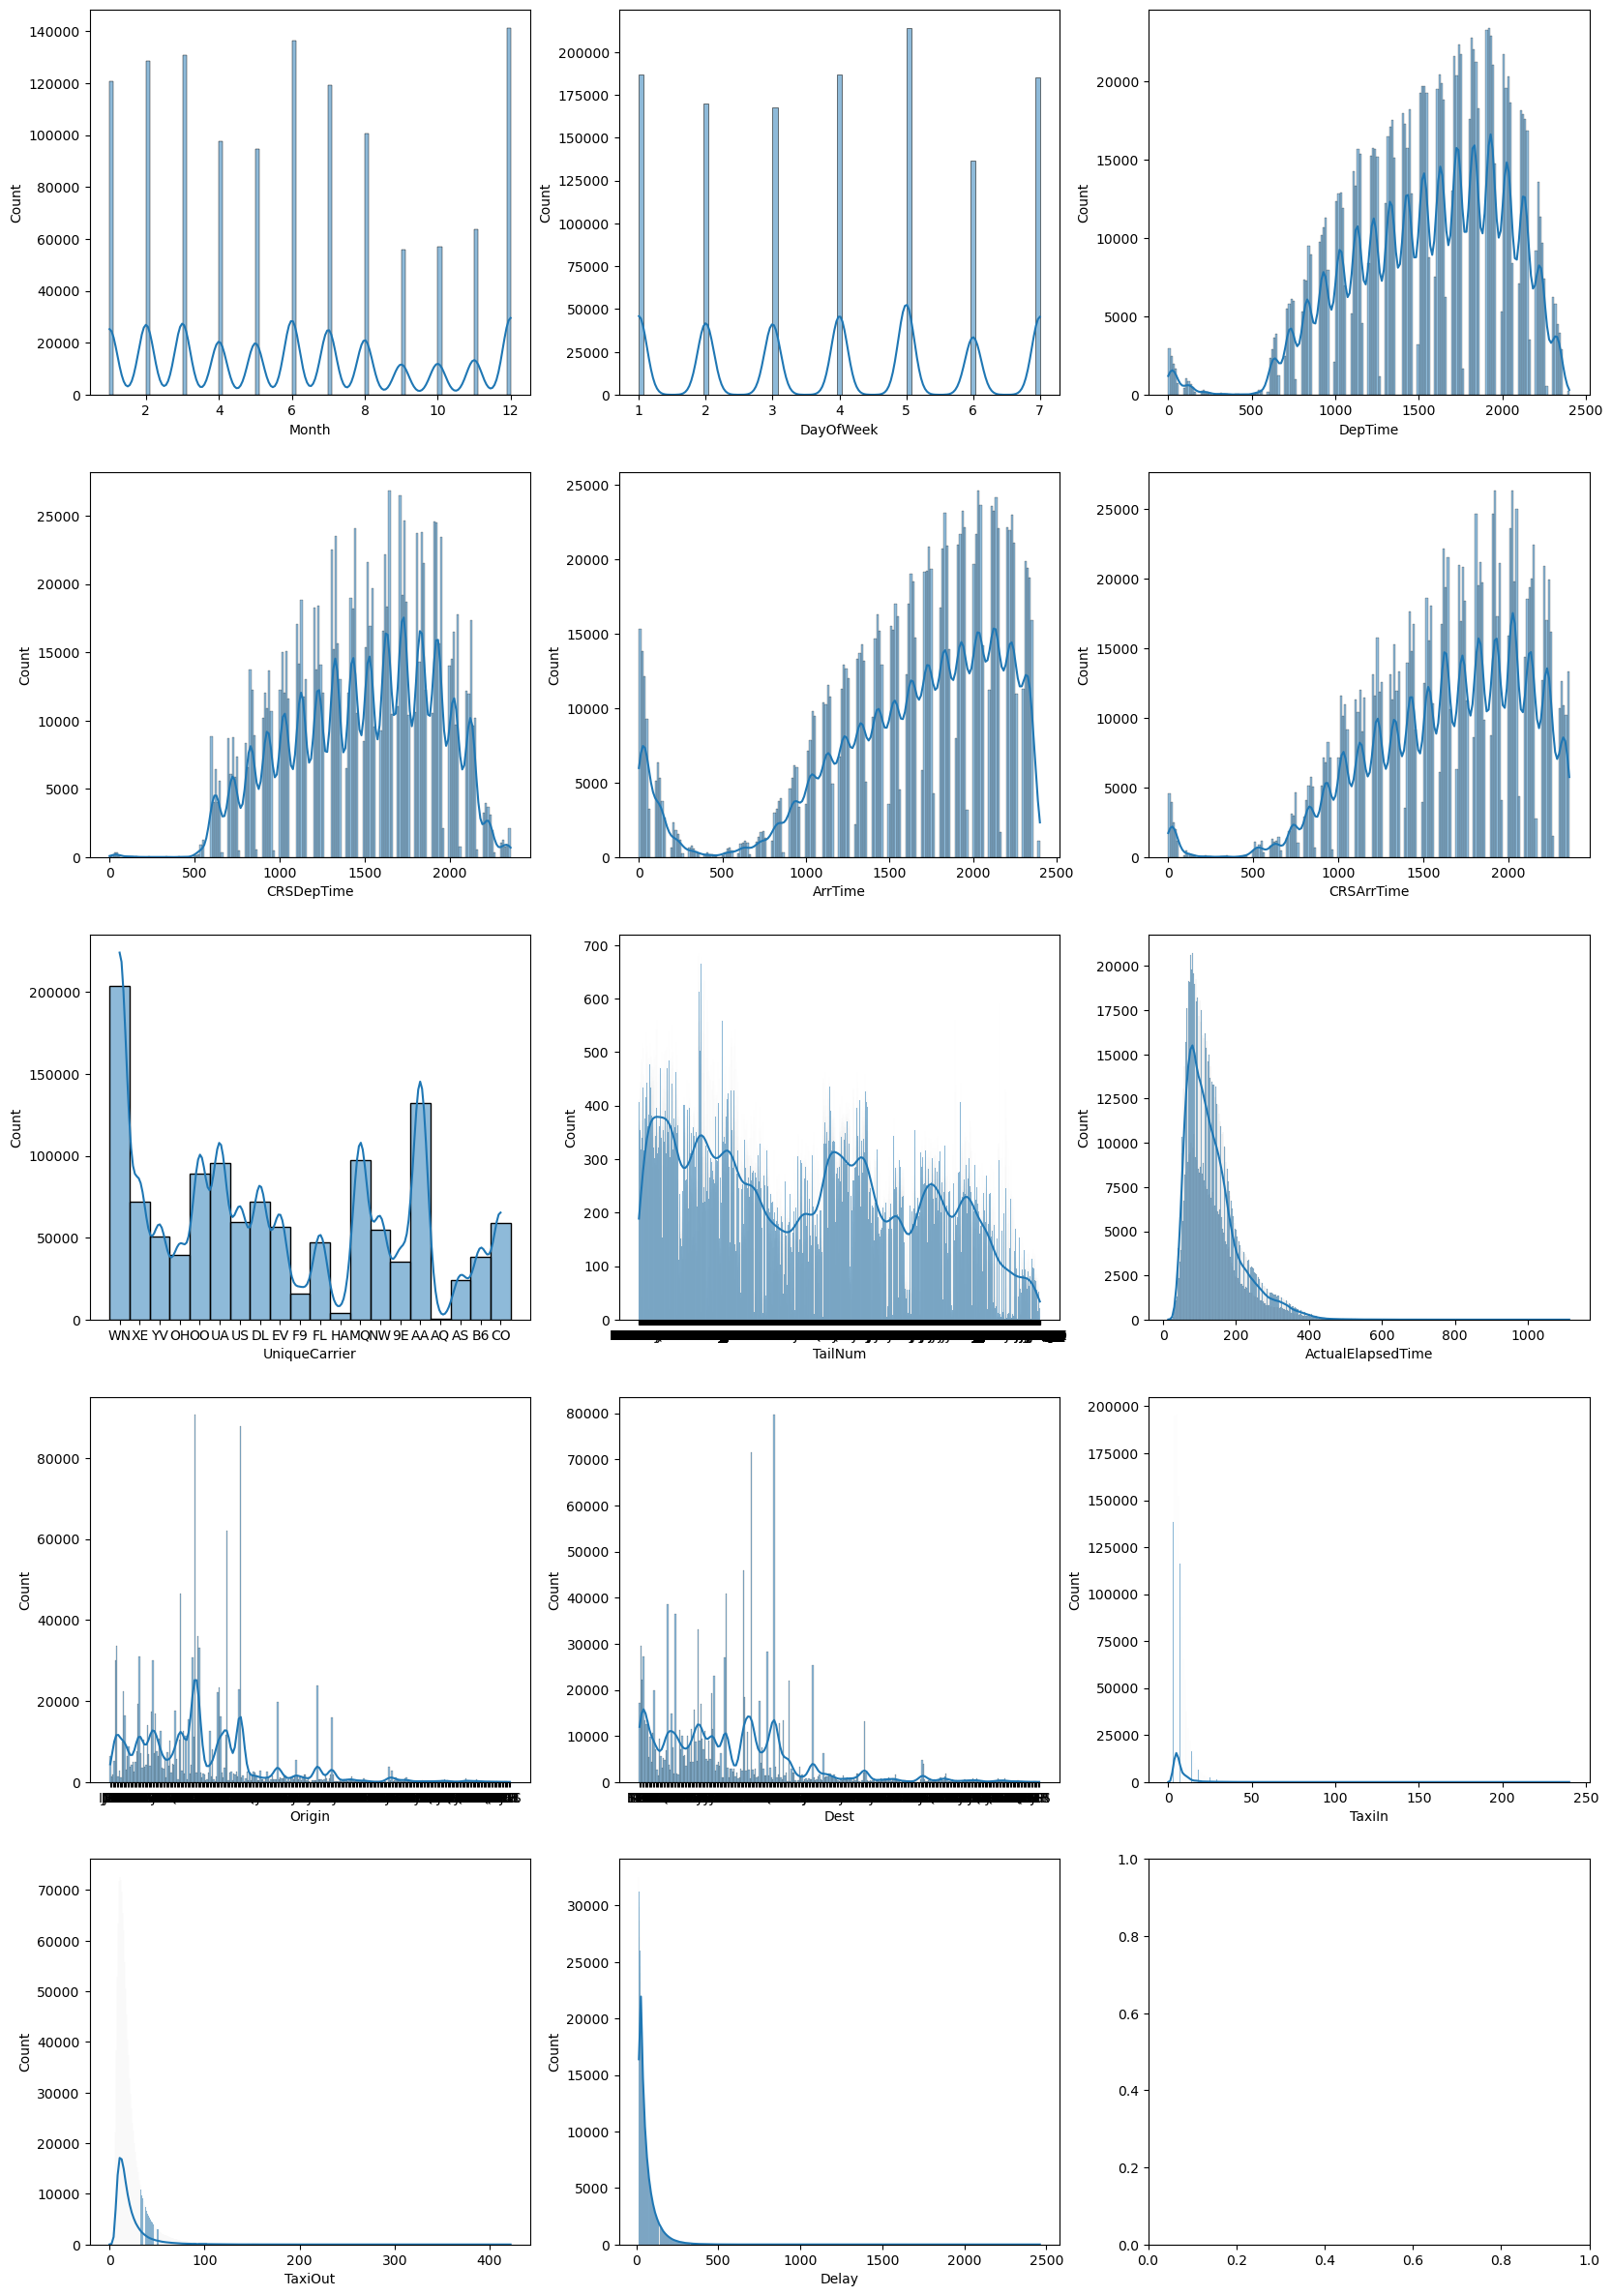

In [21]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,30))
axs = axs.ravel()

for i, c in enumerate(df):
    sns.histplot(df, x=df[c], ax=axs[i], kde=True)

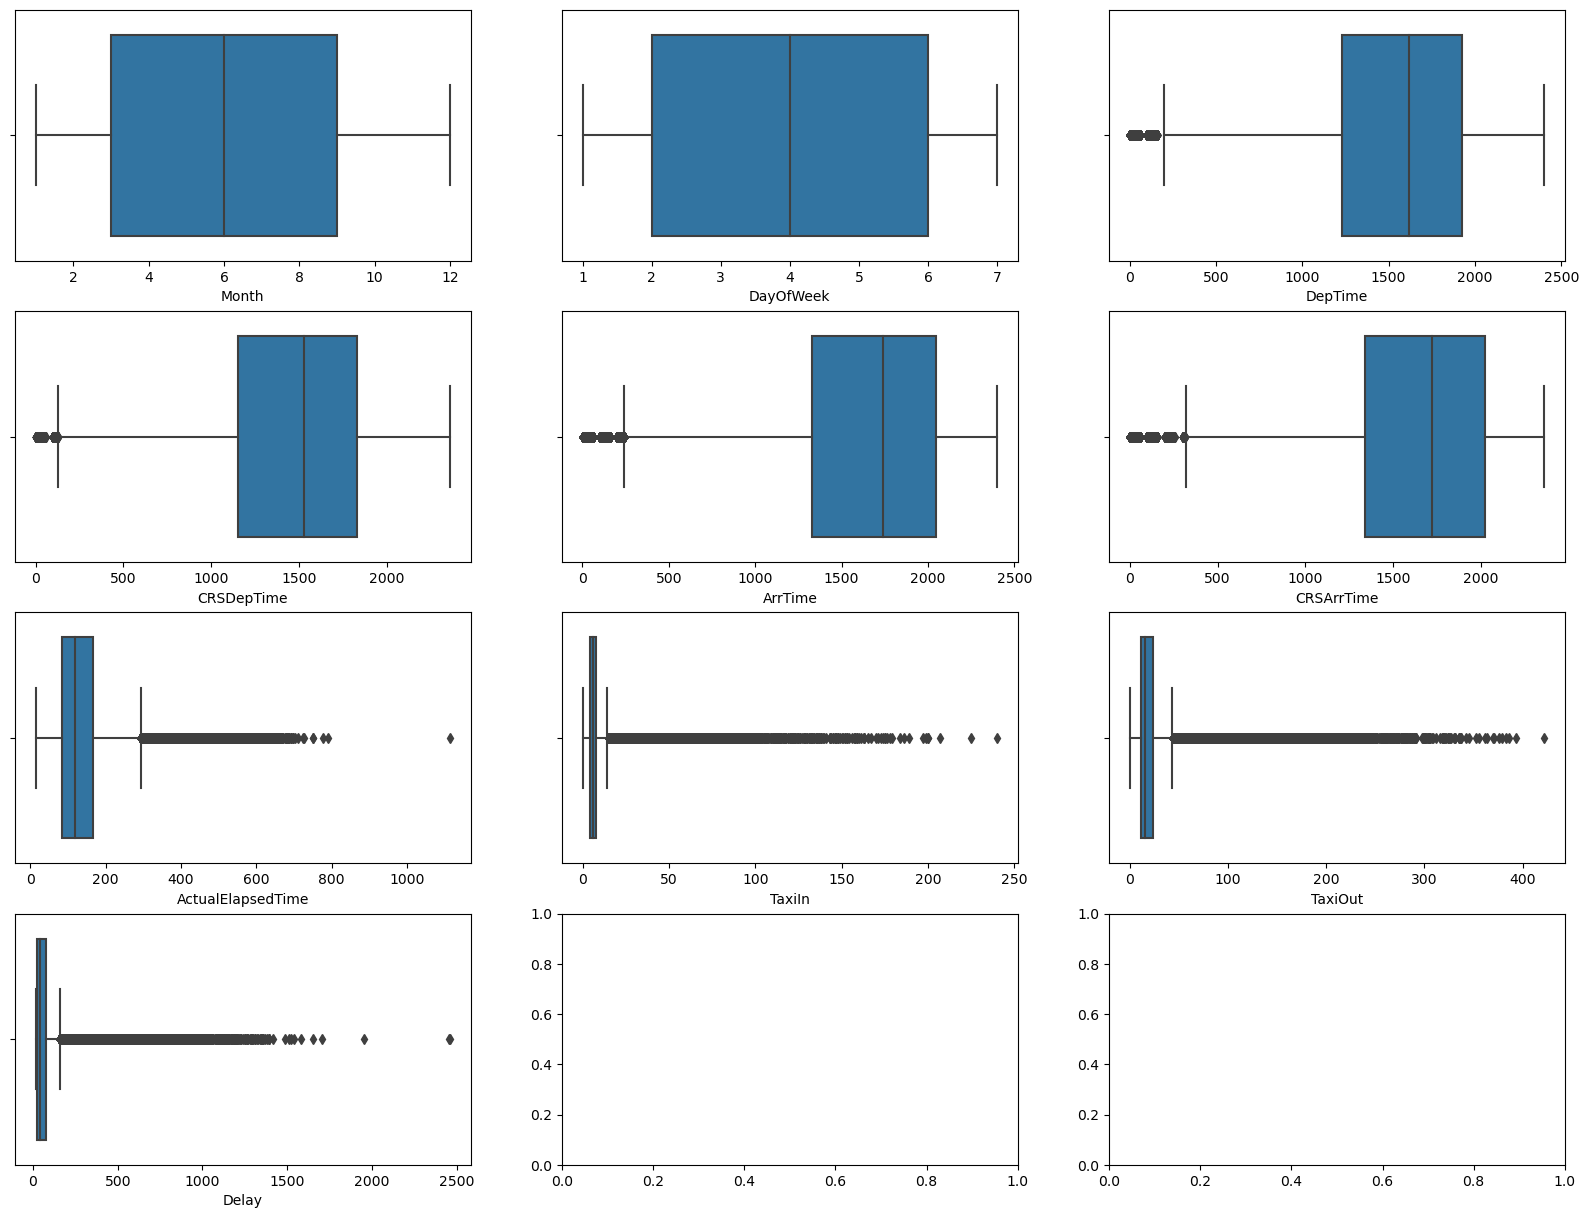

In [22]:
numerical_columns = df.select_dtypes('number').columns

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
axs = axs.ravel()

for i, c in enumerate(numerical_columns):
    sns.boxplot(df, x=df[c], orient='h', ax=axs[i])

---
## Handling Outliers 
### Data Transformations on the features with skewed distribution

Boxplots after features transformation.


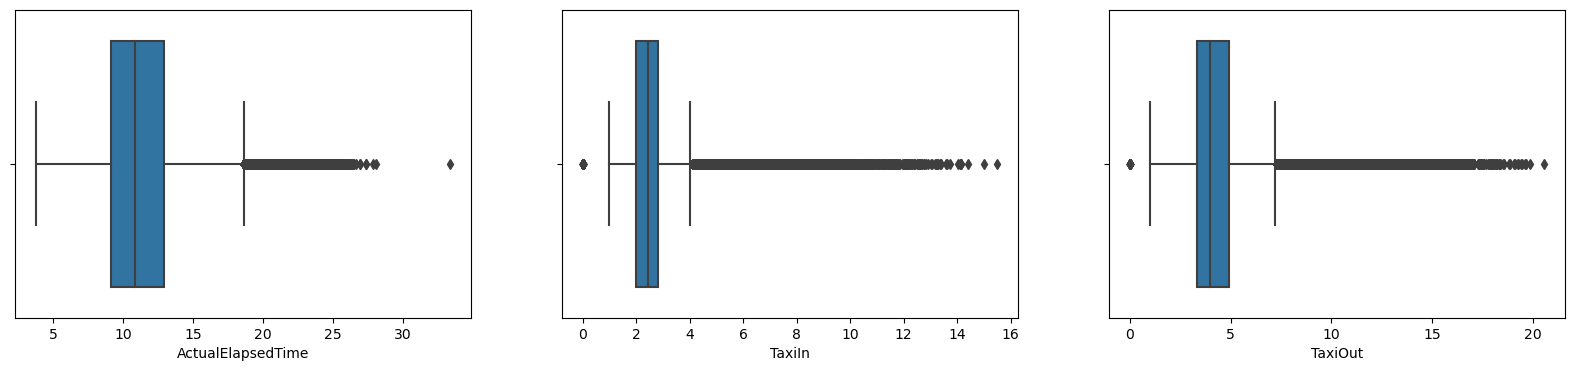

In [23]:
# Transformation on exponentially distributed features

sqrt_trans = ['ActualElapsedTime', 'TaxiIn', 'TaxiOut']

df[sqrt_trans] = df[sqrt_trans].apply(lambda x: np.sqrt(x))

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
axs = axs.ravel()

for i, c in enumerate(df[sqrt_trans]):
    sns.boxplot(df, x=df[c], orient='h', ax=axs[i])
    
print('Boxplots after features transformation.')

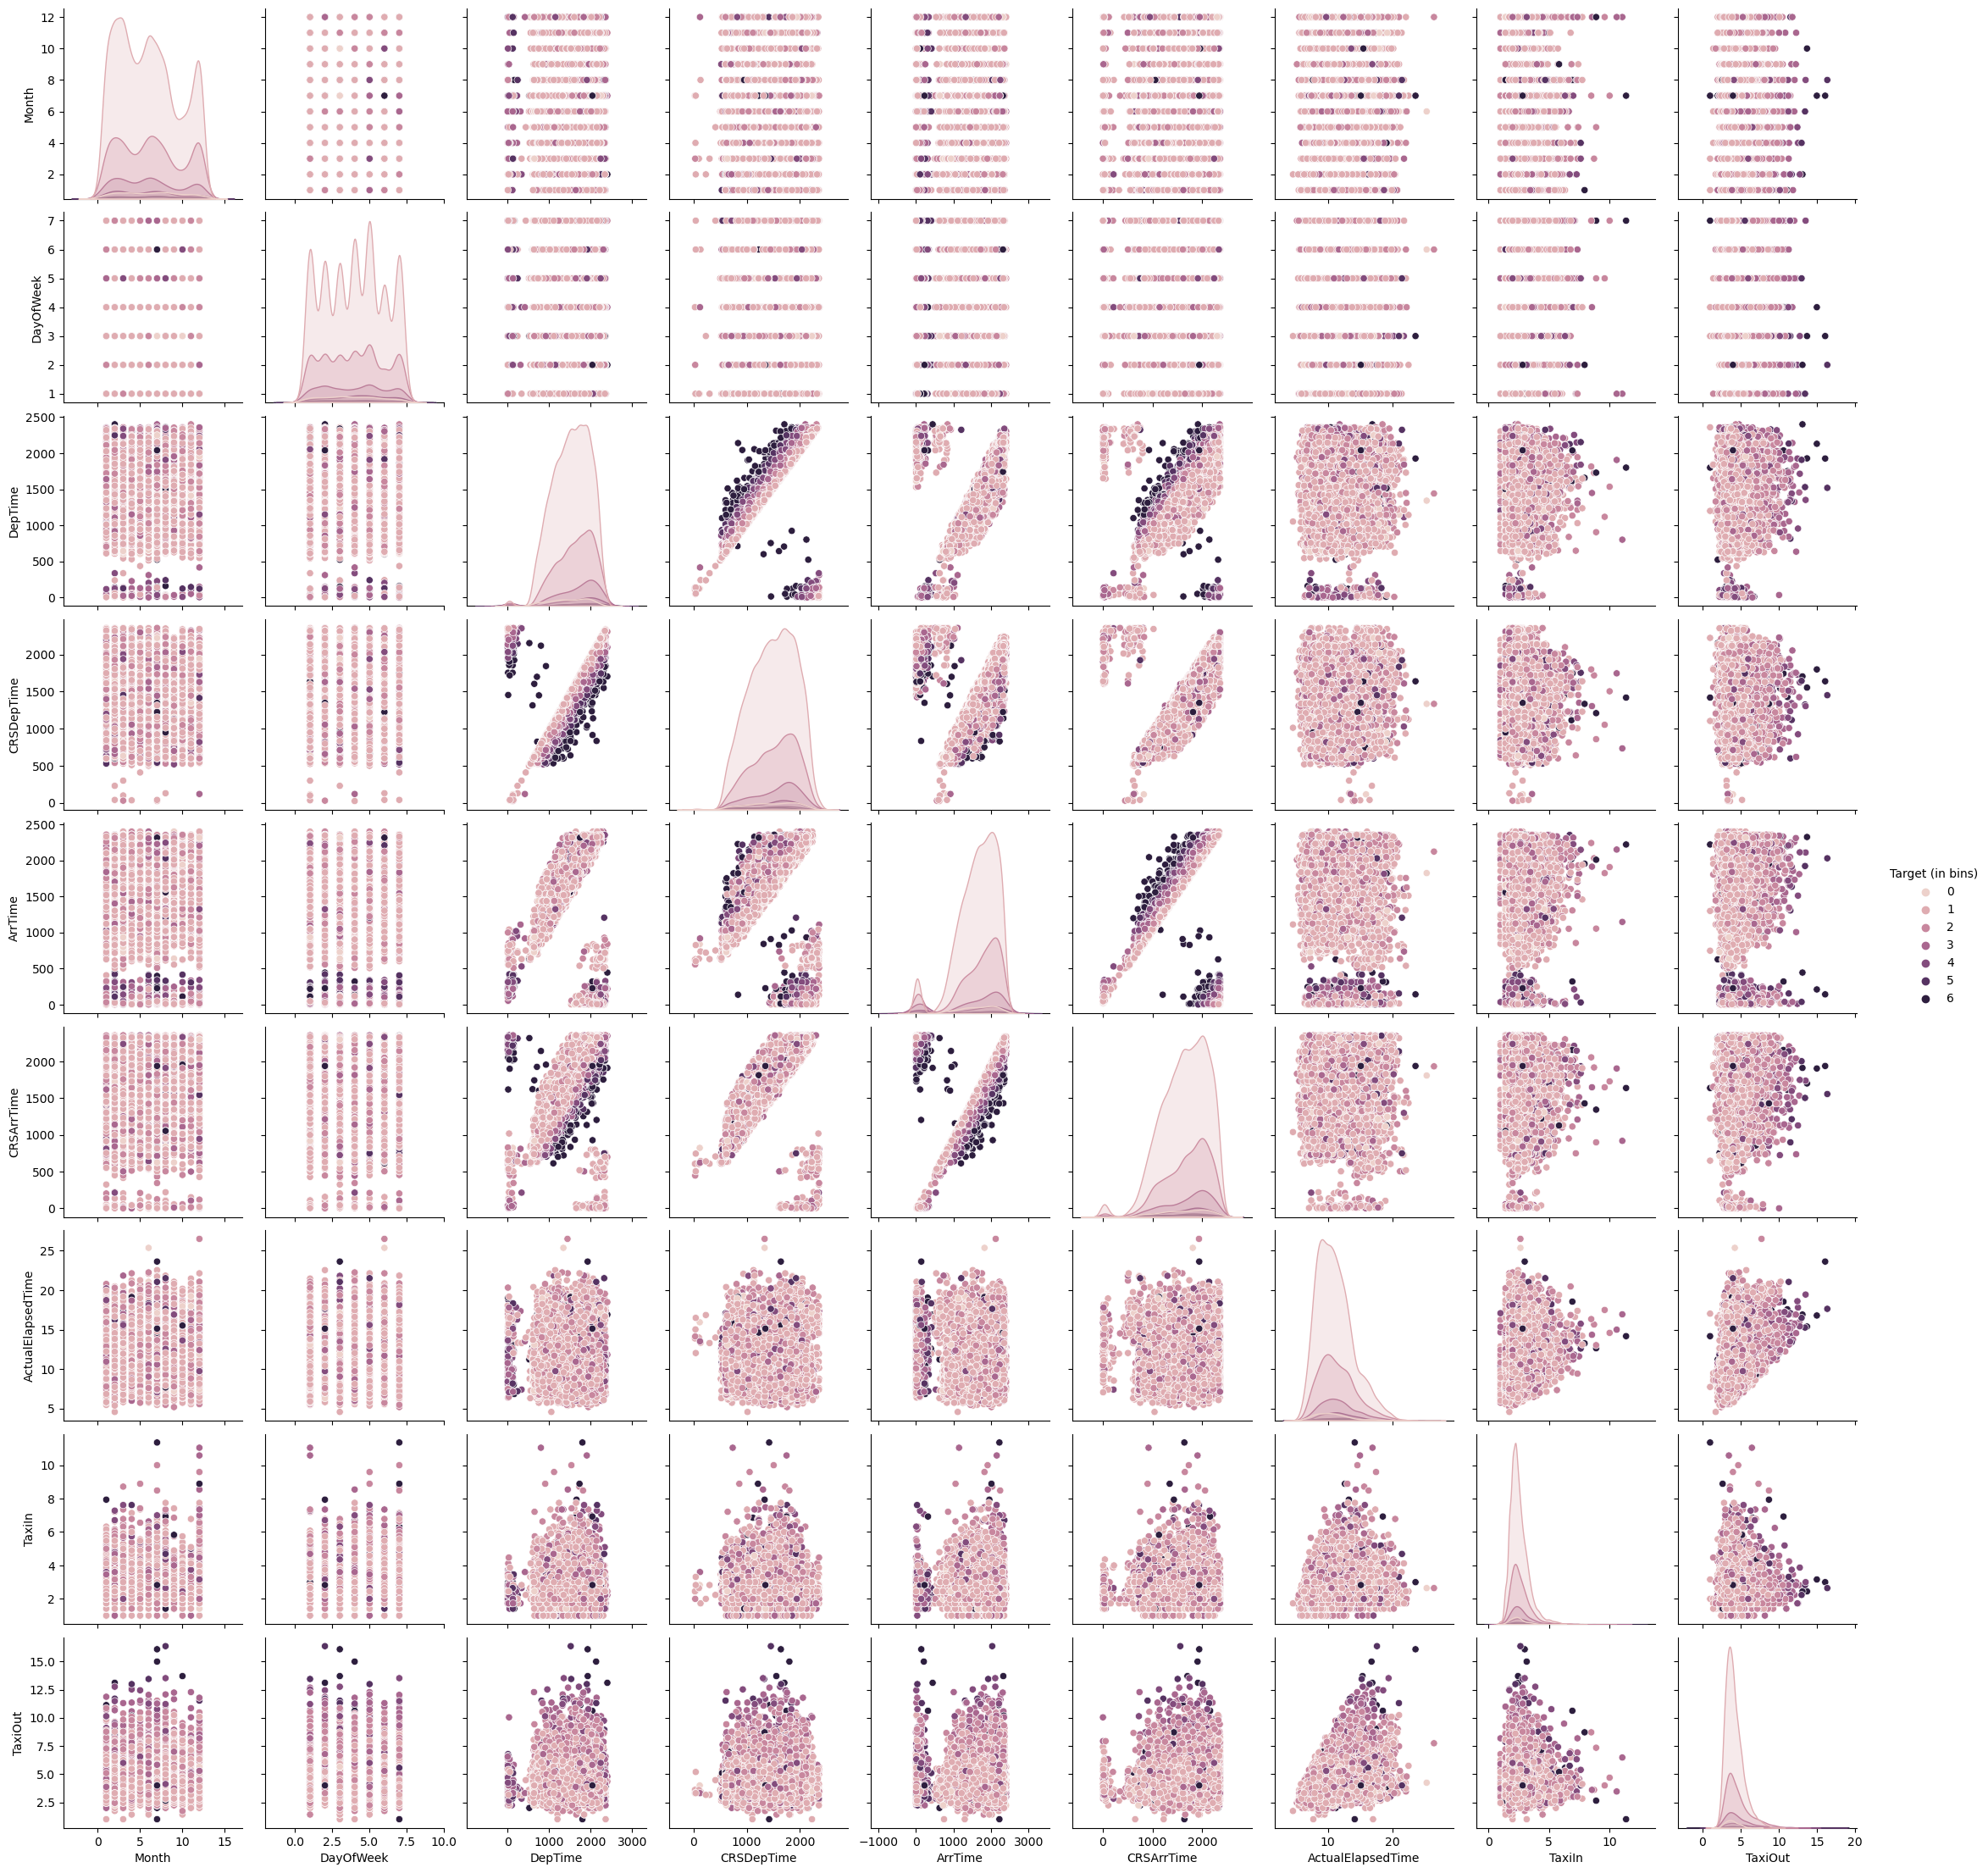

In [24]:
A = df.drop(columns=['Delay'])                            
b = df['Delay']

bins = [15, 60, 120, 180, 240, 300, 2462]
y_binned = np.digitize(b, bins=bins, right=True)


y_new = pd.Series(y_binned)
y_new.name = 'Target (in bins)'

X_train, X_test, y_train, y_test = train_test_split(A, y_new, test_size=0.01, stratify=y_binned, random_state=RANDOM_STATE)

df_pairplot = pd.concat([X_test, y_test], axis=1)

sns.pairplot(df_pairplot, hue='Target (in bins)')
plt.show()


#
# 
---

# Version I 
### * Without target class transformation

In [25]:
# After all of the above transformations, I'm saving the cleaned dataset for further hyperpameter optimization

df.to_csv('AirlineDelay_CleanDataset.csv')

#
# Version II 
### * With Log transformation on target class

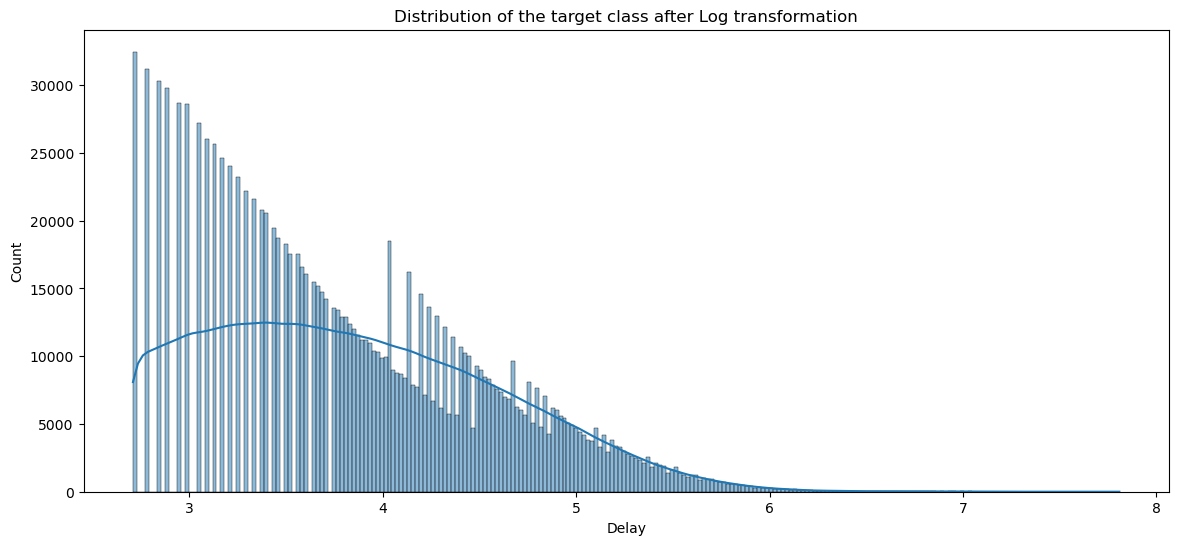

In [26]:
# Log transformation on the target class

log_trans = ['Delay']
df[log_trans] = df[log_trans].apply(lambda x: np.log(x))

fig = plt.figure(figsize=(14, 6))
sns.histplot(df, x=df['Delay'], kde=True)
plt.title('Distribution of the target class after Log transformation')
plt.show()

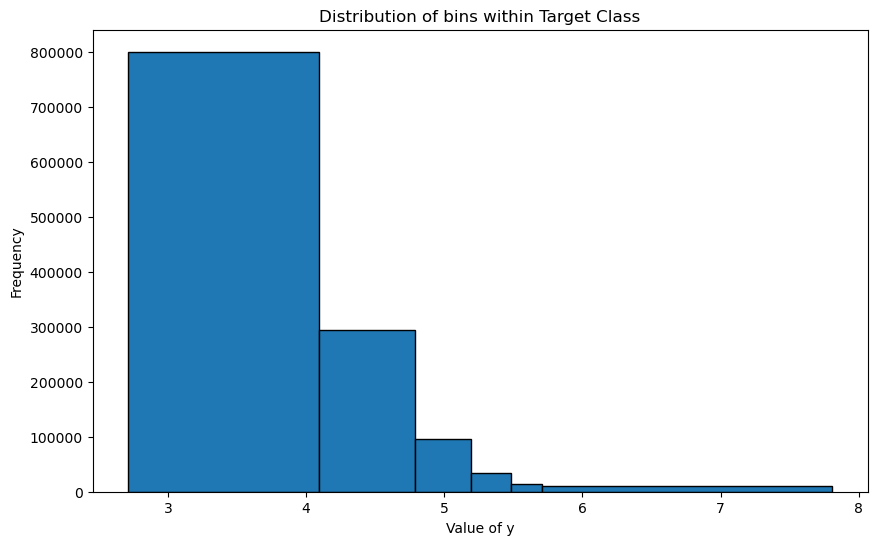

Bin 1: 799657 samples
Bin 2: 293221 samples
Bin 3: 95963 samples
Bin 4: 34499 samples
Bin 5: 13322 samples
Bin 6: 10822 samples


In [27]:
y = df['Delay']

original_bins = [15, 60, 120, 180, 240, 300, 2462] 
bins = [np.log(x) for x in original_bins]

y_binned = np.digitize(y, bins=bins, right=True)

plt.figure(figsize=(10, 6))
plt.hist(y, bins=bins, edgecolor='k')
plt.xlabel('Value of y')
plt.ylabel('Frequency')
plt.title('Distribution of bins within Target Class')
plt.show()

hist, bin_edges = np.histogram(y, bins=bins)

for i in range(len(hist)):
    print(f'Bin {i+1}: {hist[i]} samples')

In [28]:
# Saving the cleaned dataset for further hyperpameter optimization

df.to_csv('AirlineDelay_CleanDataset_LogTransofmation.csv')



#
# Version III 
### * Additional deletation of correlated columns, without target class transformation

In [29]:
# Same as first version but with dropping aditional features after correlation analysis 'CRSDepTime', 'CRSArrTime':

org_df = pd.read_csv('airlinedelaycauses_DelayedFlights.csv', index_col=0).reset_index(drop=True) 
df = org_df.copy()

df.dropna(subset=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], how='any', inplace=True)

df['Delay'] = df['CarrierDelay'] + df['WeatherDelay'] + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay']

cols_to_drop = ['FlightNum', 'DayofMonth', 'Year', 'CancellationCode', 'Cancelled', 'Diverted', 'CarrierDelay', 
                'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CRSDepTime', 'CRSArrTime', 
                'DepDelay', 'ArrDelay', 'CRSElapsedTime', 'AirTime', 'Distance']

df = df.drop(columns=cols_to_drop)

df.drop_duplicates(inplace=True)
df.dropna(subset=['TailNum'], how='all', inplace=True)

sqrt_trans = ['ActualElapsedTime', 'TaxiIn', 'TaxiOut']
df[sqrt_trans] = df[sqrt_trans].apply(lambda x: np.sqrt(x))

df = df.reset_index(drop=True)

In [30]:
# Saving the cleaned dataset for further hyperpameter optimization

df.to_csv('AirlineDelay_CleanDataset_AdditionalDeletation.csv')



#
# Version IV 
### * Delay columns substraction, without target class transformation

In [31]:
# All transformation from above, just this time I'm adding two new columns:
# df['DepTDelay'] = df['DepTime'] - df['CRSDepTime']
# df['ArrTDelay'] = df['ArrTime'] - df['CRSArrTime']
# and I'm deleting the original columns 

org_df = pd.read_csv('airlinedelaycauses_DelayedFlights.csv', index_col=0).reset_index(drop=True) 
df = org_df.copy()

df.dropna(subset=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], how='any', inplace=True)

df['Delay']     = df['CarrierDelay'] + df['WeatherDelay'] + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay']
df['DepTDelay'] = df['DepTime'] - df['CRSDepTime']
df['ArrTDelay'] = df['ArrTime'] - df['CRSArrTime']

cols_to_drop = ['FlightNum', 'DayofMonth', 'Year', 'CancellationCode', 'Cancelled', 'Diverted', 'CarrierDelay', 
                'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DepTime', 'CRSDepTime', 'ArrTime', 
                'CRSArrTime', 'DepDelay', 'ArrDelay', 'CRSElapsedTime', 'AirTime', 'Distance']
df = df.drop(columns=cols_to_drop)

df.drop_duplicates(inplace=True)
df.dropna(subset=['TailNum'], how='all', inplace=True)

sqrt_trans = ['ActualElapsedTime', 'TaxiIn', 'TaxiOut']
df[sqrt_trans] = df[sqrt_trans].apply(lambda x: np.sqrt(x))

df = df.reset_index(drop=True)

<Axes: >

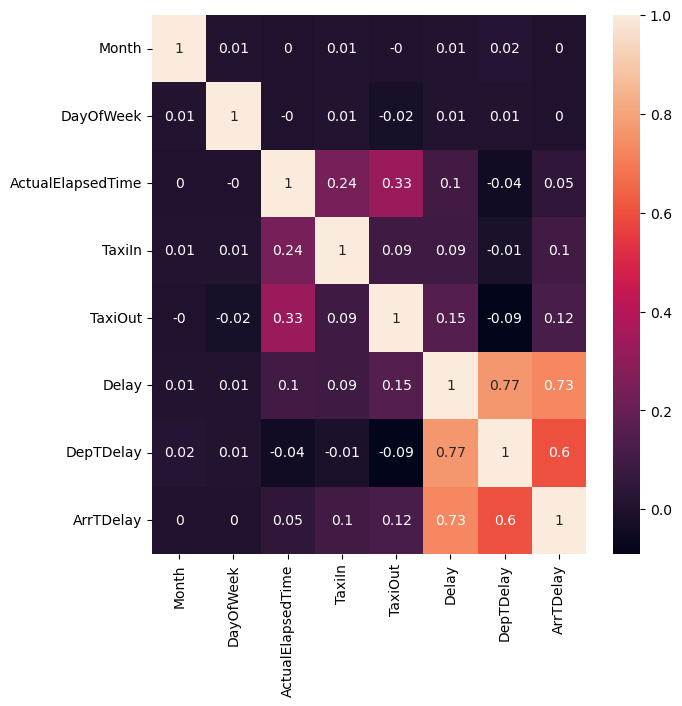

In [32]:
df_corr = df.corr(numeric_only=True, method='spearman').round(decimals=2)
plt.figure(figsize=(7,7))
sns.heatmap(df_corr, annot=True) 

<Axes: >

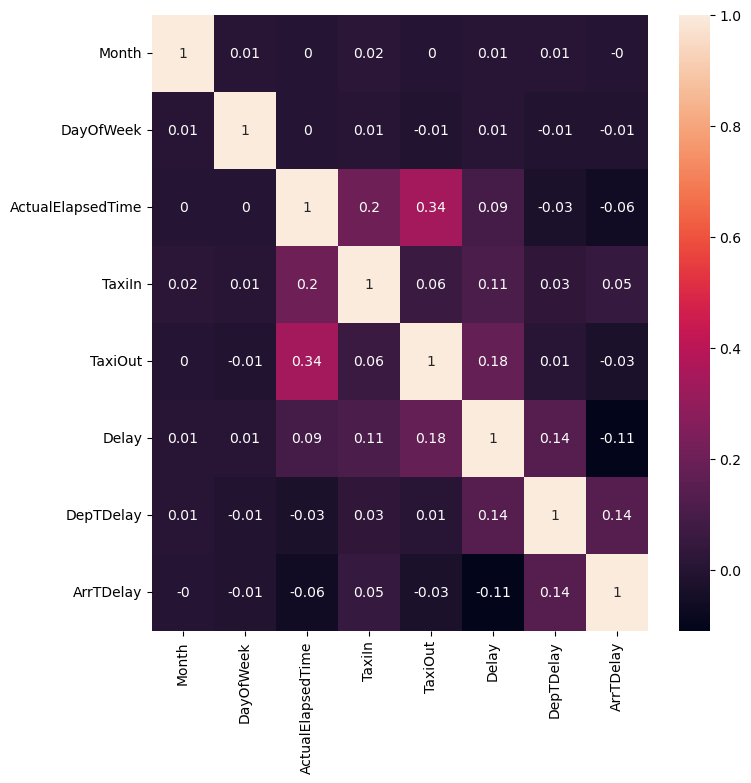

In [33]:
df_corr = df.corr(numeric_only=True, method='pearson').round(decimals=2)
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, annot=True) 

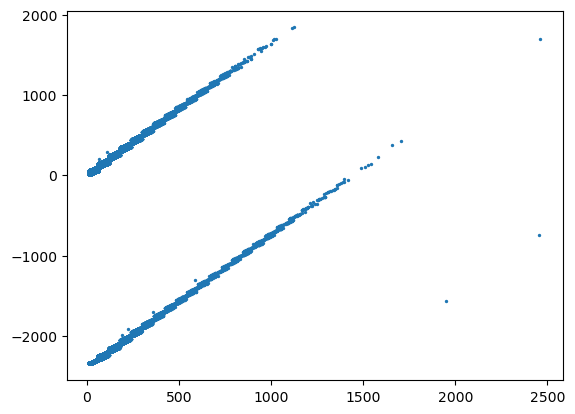

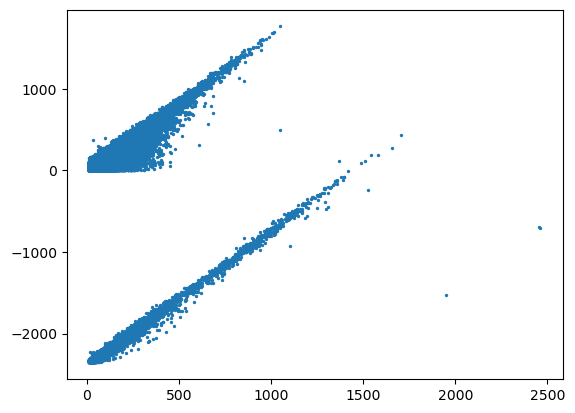

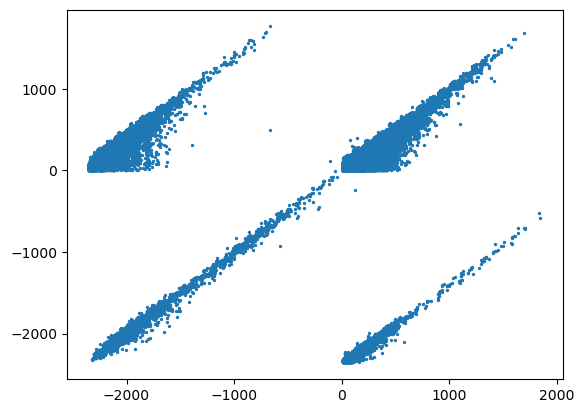

In [34]:
plt.scatter(x=df['Delay'], y=df['ArrTDelay'], s=2)
plt.show()

plt.scatter(x=df['Delay'], y=df['DepTDelay'], s=2)
plt.show()

plt.scatter(x=df['ArrTDelay'], y=df['DepTDelay'], s=2) 
plt.show()

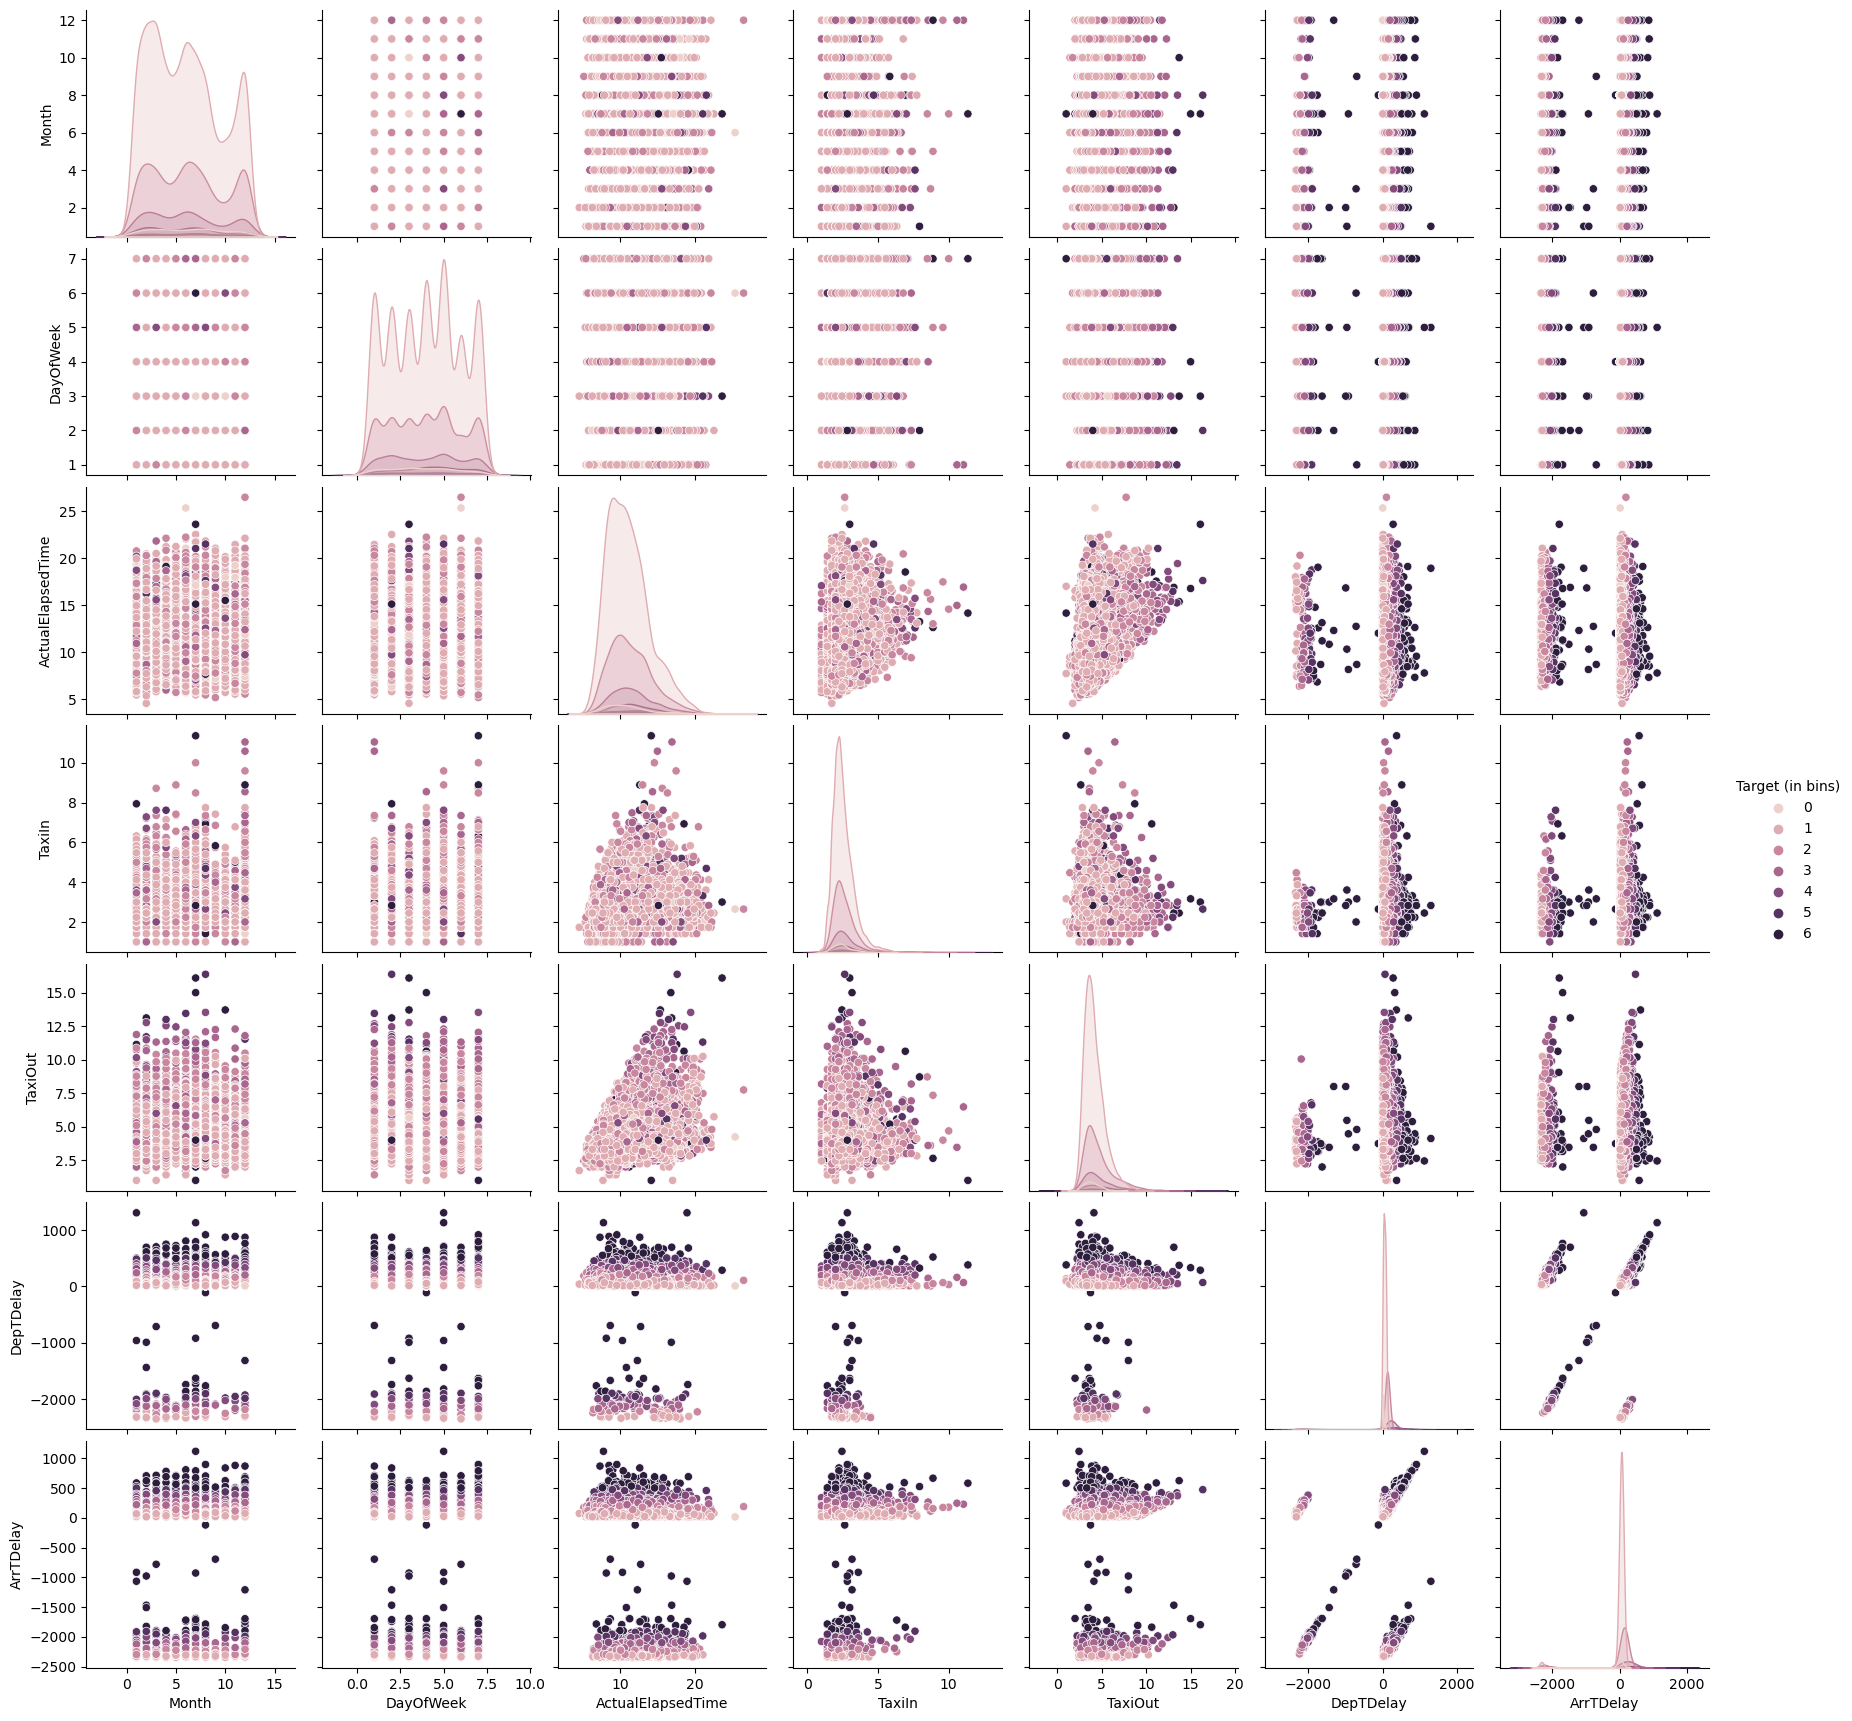

In [35]:
A = df.drop(columns=['Delay'])                            
b = df['Delay']

bins = [15, 60, 120, 180, 240, 300, 2462]
y_binned = np.digitize(b, bins=bins, right=True)


y_new = pd.Series(y_binned)
y_new.name = 'Target (in bins)'

X_train, X_test, y_train, y_test = train_test_split(A, y_new, test_size=0.01, stratify=y_binned, random_state=RANDOM_STATE)

df_pairplot = pd.concat([X_test, y_test], axis=1)

sns.pairplot(df_pairplot, hue='Target (in bins)')
plt.show()

In [36]:
# Saving the cleaned dataset for further hyperpameter optimization

df.to_csv('AirlineDelay_CleanDataset_DelaySubstraction.csv')

---
# CONCLUSION from EDA:

---
## Target class analysis: 
The target class is exponentially distributed and highly unbalanced, so therefore the best way is to use Stratified K-Folds cross-validaton in order to compute different test scores on different folds of the data. Since the target class has 1044 unique values, it needs to be digitized by converting them into a discrete variables.
The target class is time of delay in minutes, so therefore I decided that bins should be digitized within one hour range. All of the outliers are left in the last bin, because they carry meaningfull information in themselves, I decided not to delete them.

## Key findings from Heatmap:
##### Correlation Target - Features
**1)** Heatmap shows high positive correlation of 95-100% between target class: 'Delay' and features: 'ArrDelay' and 'DepDelay'. 
These features are the almost the same as target class, in fact they are not predictors, so they will be deleted.   
**2)** Target class has low correlation with all other features, but this is not enough reason to remove them from the model.  

##### Correlation Feature - Feature

**1)** Heatmap shows high positive correlation between the following features: 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Distance' ('CRSElapsedTime', 'AirTime' and 'Distance' will be deleted because they have lower correlation with target class then 'ActualElapsedTime')  
**2)** There are other colums which are highly correlated 'DepTime, CRSDeptTime', 'AirTime', 'CSRArrTime', with correlation of 40-84%, but I decided to leave them in the dataset, and maybe to try to remove one or two of them later on, just for comparison with the first model. 

## Key findings from Histplots:  
Many of the columns have exponental distribution skewed to the left.

## Key findings from Boxplots:
Transformation was made with sqrt function on three columns, which resulted in reducing the skewness in these features. 

## Transformation on the features and target with skewed distribution:
**1)** **Features**: Transformations were made by applying np.sqrt() function on the skewed features.   
**2)** **Target**:   I decided to try transformed and not-transforemed version of the target class, to see how it will performs, because this it the most important column in the dataset.    

## Key findings from Pairplot:
Pairwise relationships between variables in a dataset here unlike the other graphs, has hue in bins from the Target Class. 
There is evident pattern in few of the plots, which looks similar to linear dependence. These features were highly correlated in the Heatmap: 'DepTime, CRSDeptTime', 'AirTime', 'CSRArrTime' so there is obvious correlation from this plot as well. 

Also can be noted that: **the most frequent delays of the planes are recorded from 15-60 min. Delays of up to 2 and 3 hours have much fewer occurrences, while the rest of the delays are very rare.**


## NOTE: 
The Conclusion was written after 2 versions were tested. Other versions are not documented in detaill, but they were discused on class.

---

#
#

---
# RESULTS:

---
## 1) Baseline models: 

#### Version I - Dataset WITHOUT Log transformation on target class
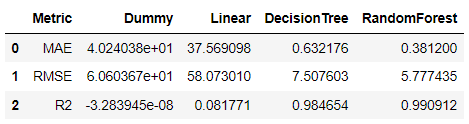

**CONCLUSION:**   
After evaluating multiple baseline models with default hyperparameters on our dataset, RandomForestRegressor() performed the best.  
DummyRegressor on the other hand, shows good stratification of the dataset splits, with R2 score: 0 %, which is very important because the dataset is highly unbalanced.

---

#### Version II - Dataset WITH Log transformation on target class
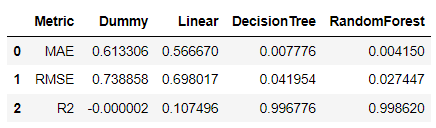   
**CONCLUSION:**    
There is a slight improvement in all the models than in previous case.

---

#### Version III - Dataset WITHOUT Log transformation on target class and Additional Deletation on correlated colums
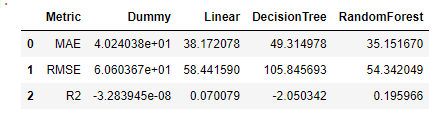  
**CONCLUSION:**   
RandomForestRegressor() performed the best. This time score is very low compared to previous models.

---

#### Version IV - Dataset WITHOUT Log transformation on target class and Delay Substraction
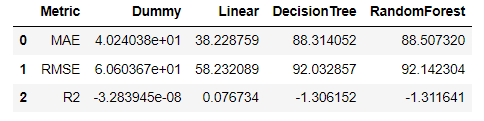

**CONCLUSION:**   
This model has the lowest performance among all the models evaluated. 

---

## 2) Model Hyperparameter Optimization with Random Search: 
#### Version I - Dataset WITHOUT Log transformation on target class
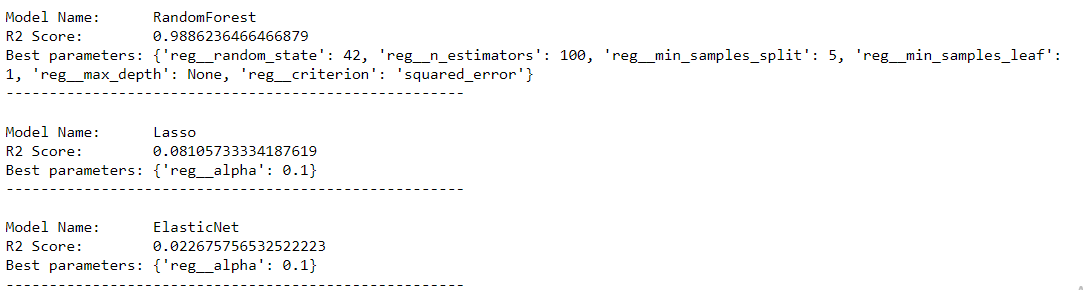   
**CONCLUSION:**   
RandomForestRegressor() once again performed the best. 

---

#### Version II - Dataset WITH Log transformation on target class
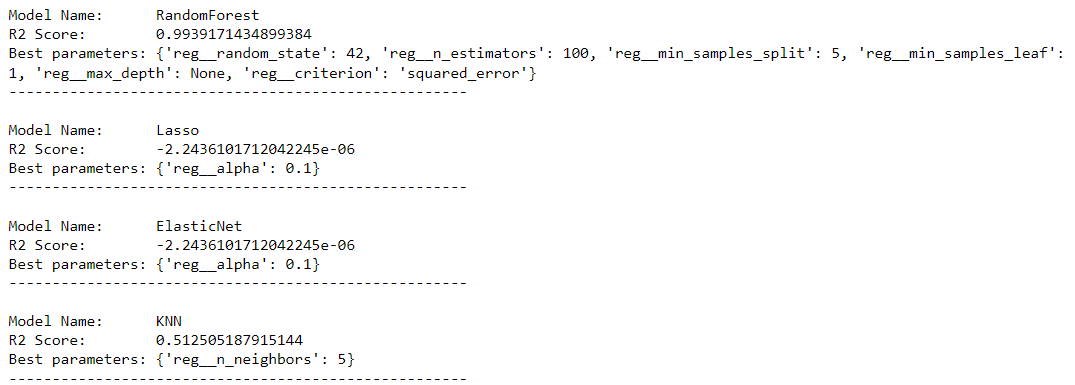   

**CONCLUSION:**   
There is a slight improvement in Random Forest, but other models are way worst than in previous case.

---

#### Version III - Dataset WITHOUT Log transformation on target class and Additional Deletation on correlated colums
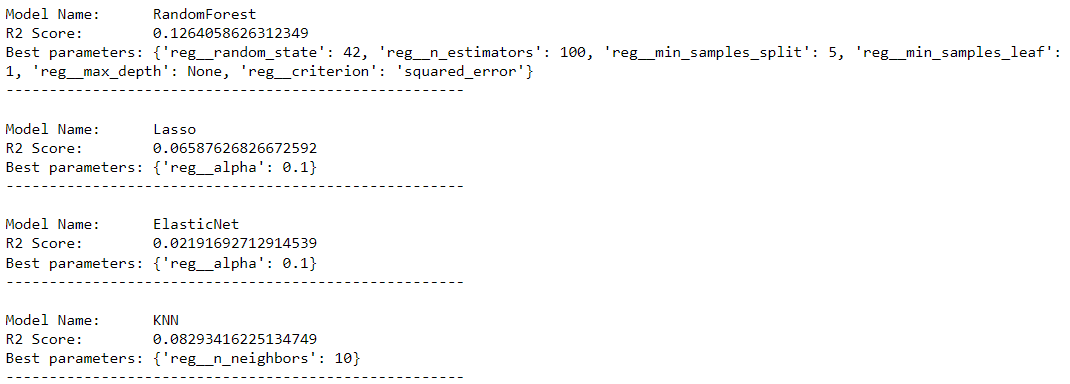
   
**CONCLUSION:**   
RandomForestRegressor() performed the best. KNN has also high score in this model.

---

#### Version IV - Dataset WITHOUT Log transformation on target class and Delay Substraction
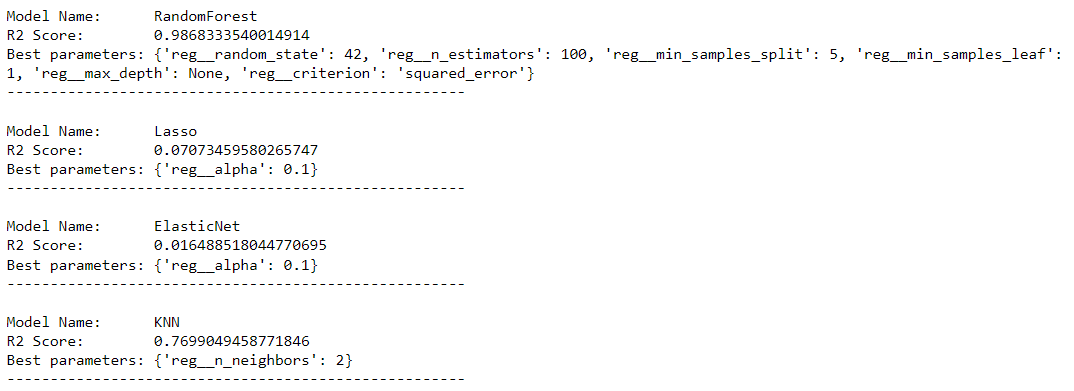

**CONCLUSION:**   
Unlike Baseline model who has the lowest performance on this dataset, Random Forest performed excelent. Even KNN has high score. 

---

## 3) Model Hyperparameter Optimization with Grid Search: 
#### Version I - Dataset WITHOUT Log transformation on target class
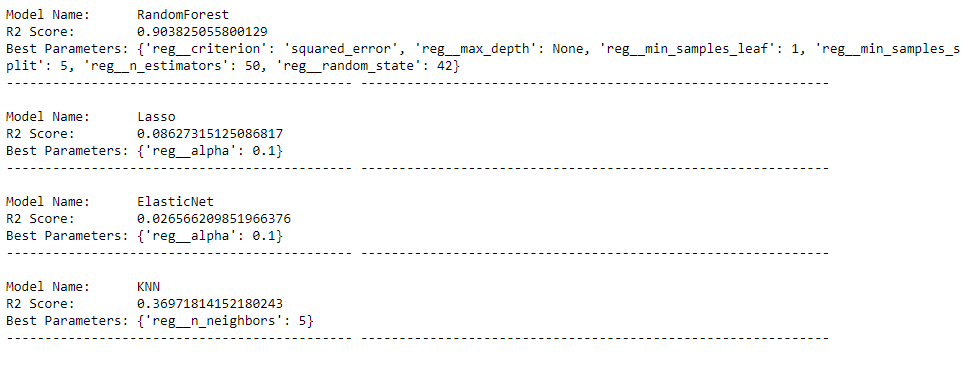

**CONCLUSION:**   
The result is worse than all other models: Baseline models, Grid Search and TPOT optimization. I only managed to test GRID Search on only 1% of the dataset. I wasn't able to test it on whole dataset, not even on 10% of the dataset, because it took more than 8 hours for 10% od the dataset and it still wasn't finished so I terminated the program.
I think that maybe smaller result compared to other optimization models is consequence of the small dataset that was tested.

---

## 4) Model Hyperparameter Optimization with TPOT (Genetic optimization algorithms) : 
#### Version I - Dataset WITHOUT Log transformation on target class 

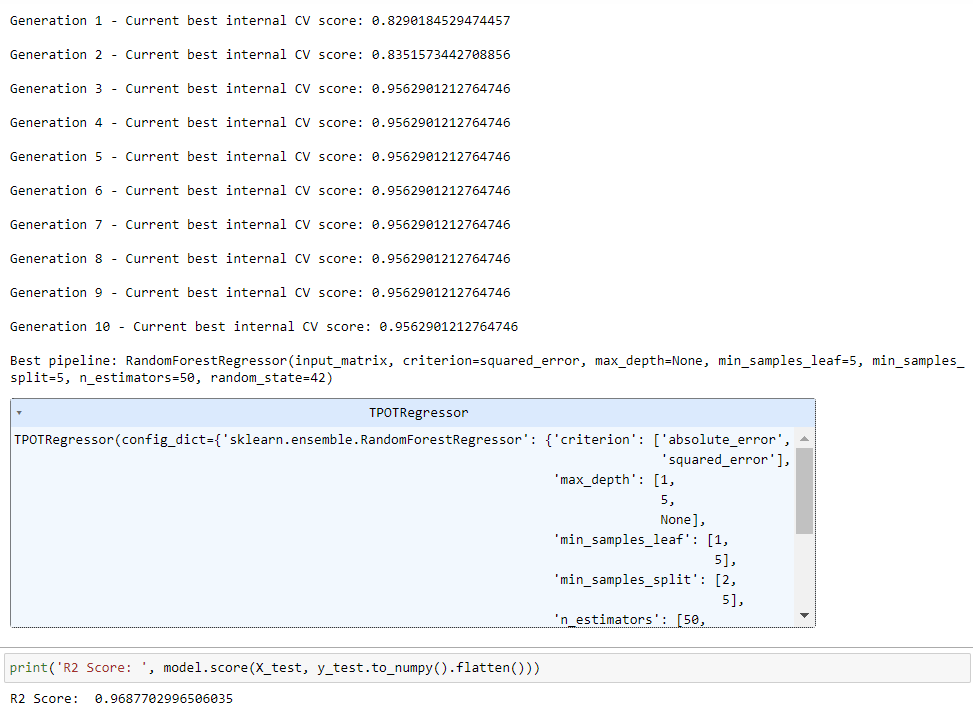

**CONCLUSION:**  
The result is worse than Baseline models, but I only managed to test TPOT on 10% of the dataset. I wasn't able to test it on whole dataset, because it took more than 12 hours and it still wasn't finished so I terminated the program.

---

#####

## Recommendations for future improvement:
---
In the future, we can focus on the following areas to further enhance our model's performance:

### * Slight changes in Features: 
Next step is to make some changes in the feature columns. For start we can try to remove two of the three columns that are highly correlated, with 71 - 84%.     
Try with removing the TailNumber column, because it has a lot of unique values and therefore its predictive power might be lower.    
Although I deleted the Distance column, I think it would be good to try and leave it, because it is a direct variable that indicates the exact distance between two destinations. Other variables such as flight duration and categorical variables such as Destination and Origin do not reflect the distance variable as exact number.

### * Feature Engineering: 
Some additional feature transformation to see how they will reflect the model performance. Maybe log transformation instead of sqrt transformation.

### * Hyperparameter Tuning: 
Using optimization algorithms for hyperparameter tuning, especially Genetic Algorithms, can lead to increased model performance.

### * Ensemble Methods: 
Implementing additional ensemble techniques may help capture complex relationships in the data.

By addressing all of these areas, we aim to further enhance the accuracy and reliability of our predictive model.

#

## Issues with the model
There was a problem with the LabelEncoder inside the ColumnTransformer. This way the code doesn't work, I don't know for what reason, so I do the encoding before I construct the model.
Since it took me a while to figure out what the problem was, I was suspicious of the logarithmic transformation of the target column, so I decided to generally go without log transformation on the target and let the models run on that particular dataset mostly.
I did a trial with this transformation just to see a comparison, but I failed to test all the algorithms due to very slow execution time.